In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/applicat

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/applicat

AttributeError: _ARRAY_API not found

In [3]:
df=pd.read_csv("./expdata/MPRA/SuppData.csv")
df

,ID,Sequence,Number of Sp1 binding sites,Affinity group,Mean binding site affinity,Sum of binding site affinities,Spacing between sites,Orientation of sites,Replicate 1,Replicate 2,Mean
0,Sp1.1,aggaccggatcaactgaatttgaaattacgttccaggcgtcggagt...,1,1.00,12.527789,12.527789,4,fwd,0.073337,-0.040363,0.018847
1,Sp1.2,aggaccggatcaactgctccgcggcttttggtaaaaataattcgac...,1,1.00,12.527789,12.527789,10,fwd,0.073805,0.147987,0.113257
2,Sp1.3,aggaccggatcaactcgacgaaggccggcaaatagttcatgggacc...,1,1.00,12.527789,12.527789,20,fwd,-0.102820,-0.169324,-0.133712
3,Sp1.4,aggaccggatcaactgtaagtgctgtcctacactgacagtgtgact...,1,1.00,12.527789,12.527789,4,rev,0.357273,0.246388,0.304191
4,Sp1.5,aggaccggatcaactgggcgctactgcgtcgatttaagtaatgaca...,1,1.00,12.527789,12.527789,10,rev,-0.294836,-0.286001,-0.288058
...,...,...,...,...,...,...,...,...,...,...,...
191,Sp1.192,aggaccggatcaactcagtcccggggaatgcatgaagttcgctccc...,6,0.25,6.965672,41.794034,10,tandem,-0.040295,-0.175021,-0.105298
192,Sp1.193,aggaccggatcaactttccctcatcgtagatcgactttaccgctgt...,6,0.25,6.857200,41.143202,20,tandem,-0.388067,-0.502576,-0.442961
193,Sp1.194,aggaccggatcaactgttacatacccgaatcgccagagtaatcatg...,6,0.10,4.673462,28.040772,4,tandem,0.358360,0.207757,0.285419
194,Sp1.195,aggaccggatcaactattcggcaagagtgccggttagaggaccatc...,6,0.10,4.784906,28.709437,10,tandem,0.239904,0.223515,0.234070


In [4]:
groups_affinity=sorted(df["Affinity group"].unique())

In [16]:
import matplotlib as mpl
mpl.rcParams["font.size"]=13
from matplotlib.patches import Rectangle

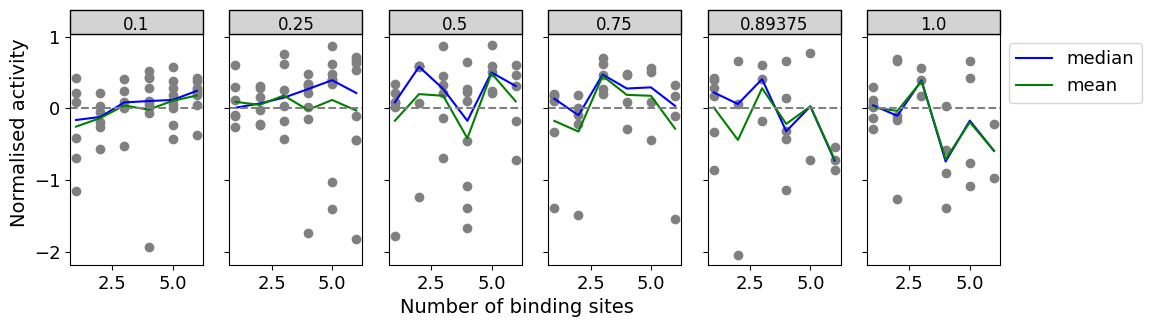

In [22]:
fig,axes=plt.subplots(1,6,figsize=(12,3),sharey=True)
for g,group in enumerate(groups_affinity):
    title=group
    subdf=df[(df["Affinity group"]==group)] #&(df["Orientation of sites"]=="tandem")]
    medians=[]
    means=[]
    ax=axes[g]
    for nsite in [1,2,3,4,5,6]:
        values=subdf[subdf["Number of Sp1 binding sites"]==nsite]["Mean"]
        if len(values)==0:
            print("no values for ", group, nsite)
        median=np.median(values)
        mean=np.mean(values)
        
        ax.scatter([nsite]*len(values),values,color="gray")
        medians.append(median)
        means.append(mean)
    ax.plot(np.arange(1,7),medians,color="blue",label="median")
    ax.plot(np.arange(1,7),means,color="green",label="mean")
    
    ax.axhline(y=0,color="gray",linestyle="--")
    ax_pos = ax.get_position()  # get [left, bottom, width, height] of subplot
    fig.patches.append(
        Rectangle(
            (ax_pos.x0, ax_pos.y1),        # (x, y) corner
            ax_pos.width, 0.08,            # width and height of box
            transform=fig.transFigure,     # place in figure coordinates
            facecolor='lightgray',
            edgecolor='black',
            linewidth=1.0,
            zorder=2
        )
    )
    # Add the text centered inside the box
    fig.text(
        ax_pos.x0 + ax_pos.width / 2,
        ax_pos.y1 + 0.03,
        title,
        ha='center', va='center',
        fontsize=12, 
        zorder=3
    )

    #ax.plot(np.arange(1,7),means,color="green")
fig.text(0.4,-0.05, "Number of binding sites",size=14)
fig.text(0.075,0.25,"Normalised activity",rotation=90,size=14)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
#fig.tight_layout()
plt.savefig("./figscode/MPRA_median_mean.svg",bbox_inches="tight")
plt.show()

    
    

In [9]:
medians

[-0.1613164, -0.1189026665, 0.083626332, 0.101777225, 0.117877125, 0.244018992]

In [10]:
np.arange(nsite,7),medians

array([1, 2, 3, 4, 5, 6])